In [1]:
# Section 1 Project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import normaltest
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 나눔고딕 폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
# matplotlib 한글깨짐현상 해결
import matplotlib as mpl

#mpl.rc("font", family = "AppleGothic")
mpl.rc("font", family = "Malgun Gothic")
# 마이너스 사인 수정
mpl.rc("axes", unicode_minus = False)

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [5]:
# matplotlib 화질개선
import matplotlib as mpl

%config InlineBackend.figure_format = 'retina'

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [6]:
# seaborn 라이브러리 한글설정
sns.set(font='NanumBarunGothic', rc ={'axes.unicode_minus':False}, style='whitegrid')

# Mac
#sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

In [7]:
# 데이터 불러오기
df = pd.read_csv('./vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [9]:
# Unnamed : 0 제거
# Drop Unnamed: 0
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [10]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [11]:
# 결측치 제거
df = df.dropna(axis=0, how='any')
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [12]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [13]:
# Shape
df.shape

(16241, 9)

In [14]:
# 게임 장르 리스트 표시
genre = df['Genre'].unique()
print(genre)

['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']


In [15]:
# 각 지역별 판매량 데이터의 불필요한 문자 삭제

df['NA_Sales'] = df['NA_Sales'].str.replace(r'[a-zA-Z]', "")
df['EU_Sales'] = df['EU_Sales'].str.replace(r'[a-zA-Z]', "")
df['JP_Sales'] = df['JP_Sales'].str.replace(r'[a-zA-Z]', "")
df['Other_Sales'] = df['Other_Sales'].str.replace(r'[a-zA-Z]', "")

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [16]:
# Year 데이터 정제
def year_data(year):
    if (0<=year) & (year<=20):
        return year + 2000
    elif (20<year) & (year<=100):
        return year + 1900
    else:
        return year
    
df['Year'] = df['Year'].apply(year_data)

# Sales 칼럼의 숫자를 숫자형(실수형)으로 변경
df['NA_Sales'] = df['NA_Sales'].apply(pd.to_numeric)
df['EU_Sales'] = df['EU_Sales'].apply(pd.to_numeric)
df['JP_Sales'] = df['JP_Sales'].apply(pd.to_numeric)
df['Other_Sales'] = df['Other_Sales'].apply(pd.to_numeric)

# Year 숫자를 네자리 숫자로 맞추기
df['NA_Sales'] = df['NA_Sales'].apply(lambda x: x*1000 if x<15 else x)
df['EU_Sales'] = df['EU_Sales'].apply(lambda x: x*1000 if x<15 else x)
df['JP_Sales'] = df['JP_Sales'].apply(lambda x: x*1000 if x<15 else x)
df['Other_Sales'] = df['Other_Sales'].apply(lambda x: x*1000 if x<15 else x)

In [17]:
# 전 세계 총 판매량을 나타내는 Sales_Total 컬럼 추가
df['Sales_Total'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Total
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0


In [18]:
# 연도별 게임의 트렌드가 존재하는지 확인
year_trend = df.groupby(['Year','Genre'])['Sales_Total'].sum().unstack()
year_trend = year_trend.fillna(0)
year_trend = year_trend.reset_index()
year_trend.head()

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980.0,340.0,0.0,770.0,2700.0,0.0,0.0,0.0,0.0,7070.00,0.0,0.0,0.0
1,1981.0,14790.0,0.0,0.0,0.0,6920.0,2250.0,480.0,0.0,10020.00,440.0,780.0,0.0
2,1982.0,6500.0,0.0,0.0,870.0,5030.0,10040.0,1570.0,0.0,3810.00,0.0,1060.0,0.0
3,1983.0,2860.0,400.0,0.0,2140.0,6930.0,780.0,0.0,0.0,490.00,0.0,3200.0,0.0
4,1984.0,1850.0,0.0,0.0,1450.0,690.0,3140.0,5950.0,0.0,4196.93,0.0,6170.0,0.0


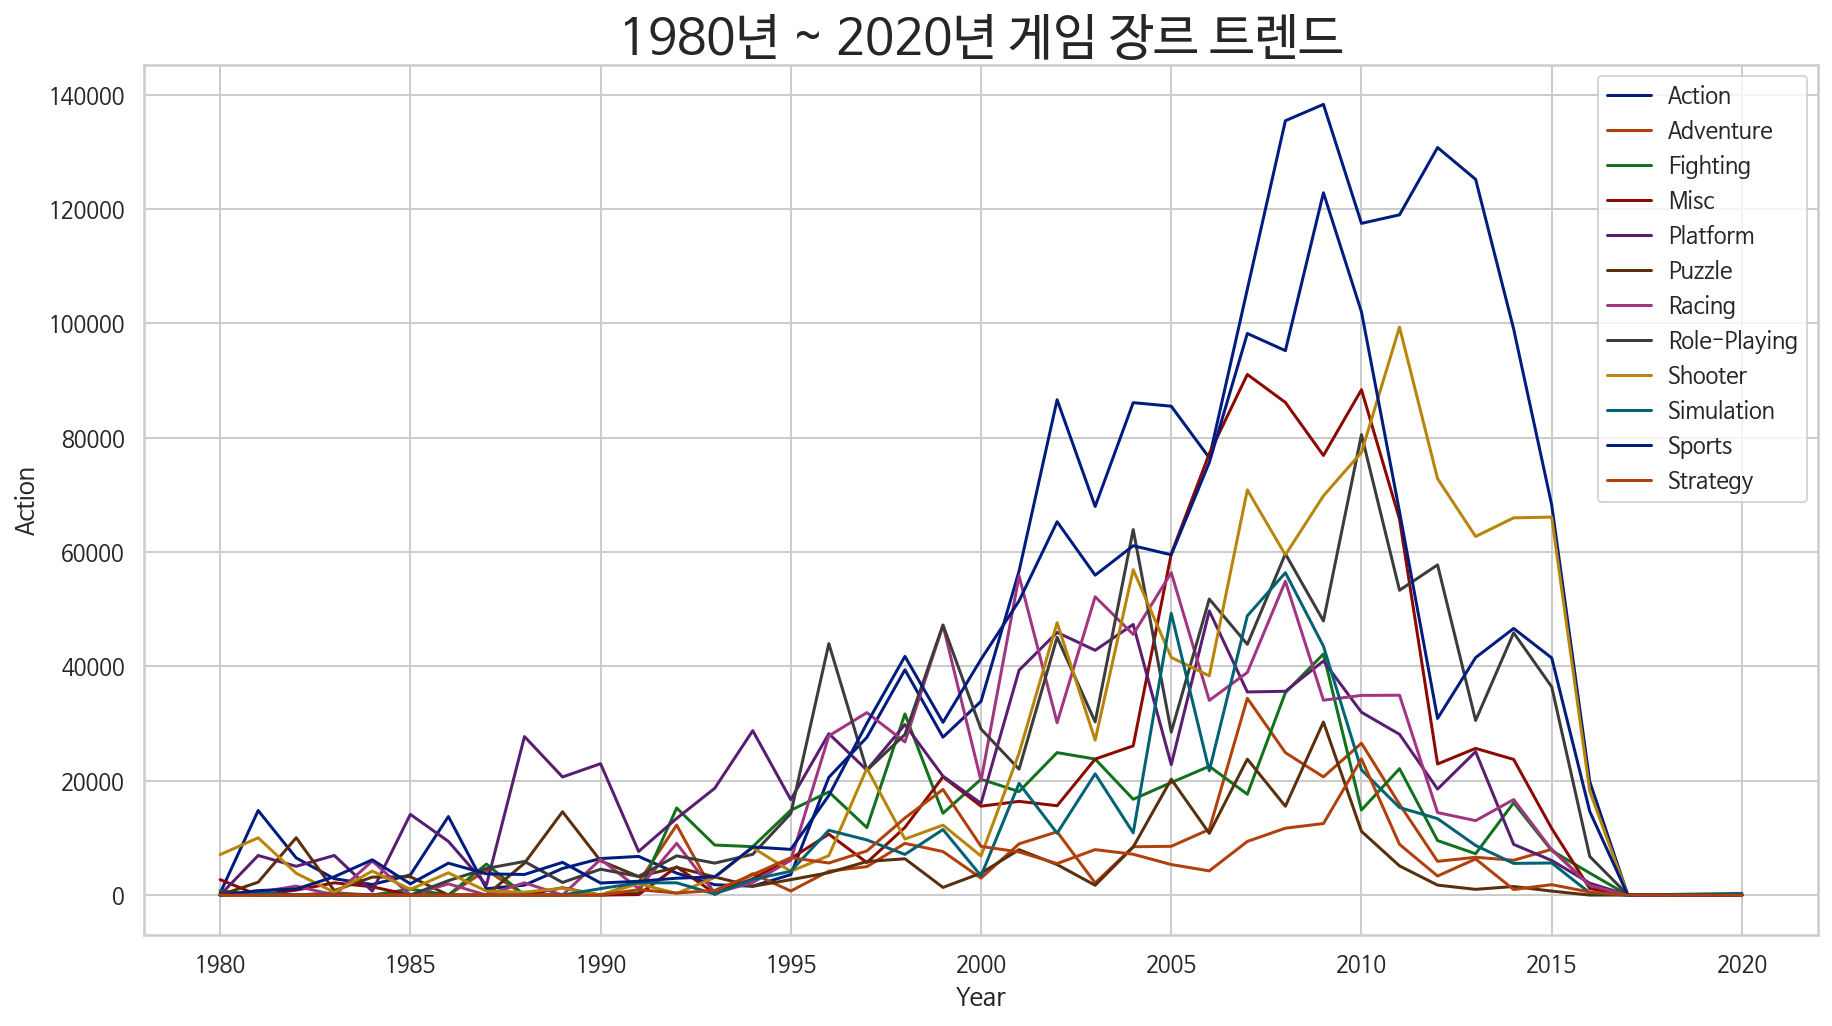

In [19]:
# seaborn 라이브러리의 lineplot으로 시각화
import seaborn as sns

sns.set_palette('dark')
color = ['']
plt.figure(figsize=(15,8))
plt.title('1980년 ~ 2020년 게임 장르 트렌드', fontsize=25)
genre = year_trend.columns
for i in range(1, len(genre)):
    sns.lineplot(data = year_trend, x='Year', y=genre[i], label=genre[i])

In [20]:
# 1980년 ~ 2020년 각 연도에 따른 국가별 출고량
df_sales = df.groupby(['Year'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Sales_Total'].sum().stack()
df_sales = df_sales.reset_index()
df_sales.rename(columns = {'level_1' : 'Region'}, inplace=True)
df_sales.rename(columns = {0 : 'Sales'}, inplace=True)
df_sales.head()

,Year,Region,Sales
0,1980.0,NA_Sales,10130.0
1,1980.0,EU_Sales,640.0
2,1980.0,JP_Sales,0.0
3,1980.0,Other_Sales,110.0
4,1980.0,Sales_Total,10880.0


Text(0.5, 1.0, '각 연도에 따른 국가별 출고량')

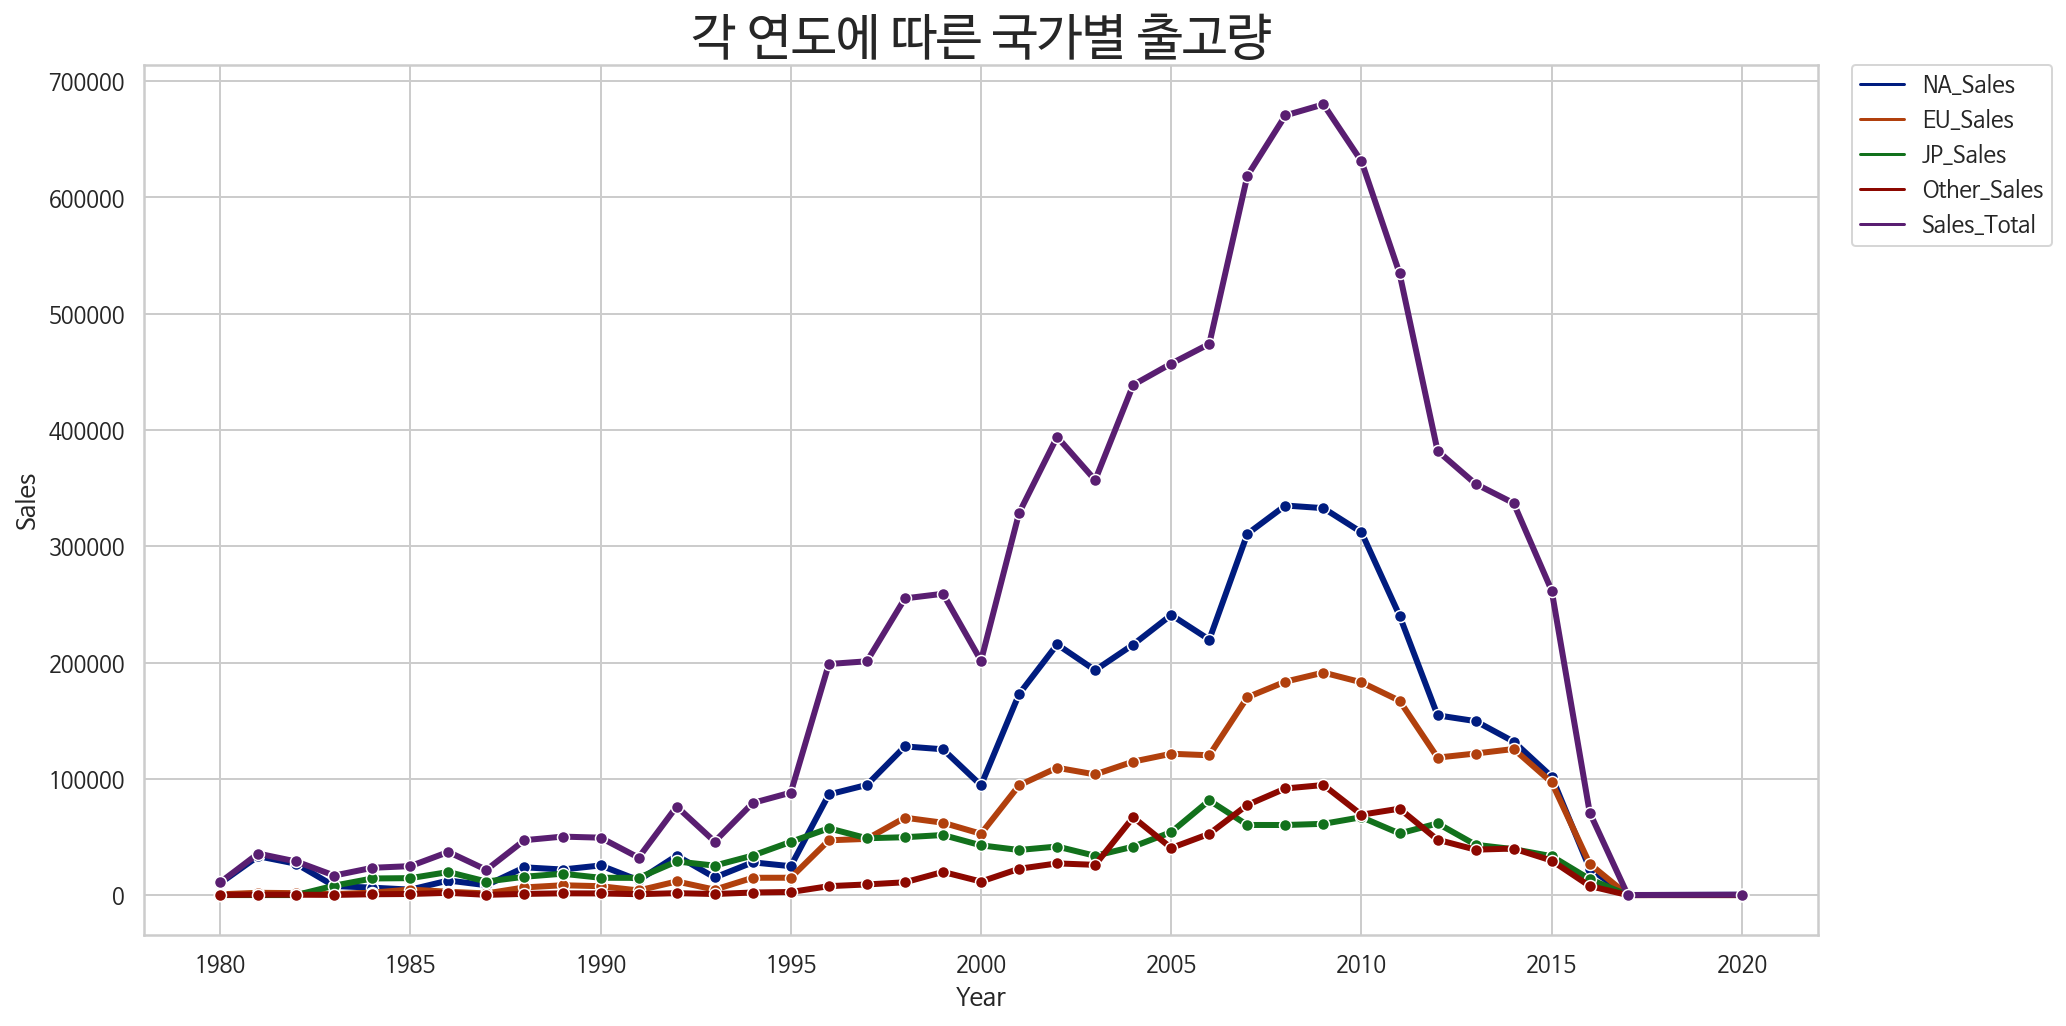

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_sales, x='Year', y='Sales', hue="Region", marker='o', linewidth=3)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('각 연도에 따른 국가별 출고량', fontsize=25)

In [22]:
# 각 연도별 게임 플랫폼별 판매량
year_platform = df.groupby(['Year', 'Platform'])['Sales_Total'].sum()
year_platform = year_platform.reset_index()
year_platform.head()

,Year,Platform,Sales_Total
0,1980.0,2600,10880.0
1,1981.0,2600,35680.0
2,1982.0,2600,28880.0
3,1983.0,2600,5840.0
4,1983.0,NES,10960.0


In [23]:
# 데이터가 너무 많으므로 상위 플랫폼 7개만 추려서 다시 시각화
game_platform = year_platform.groupby('Platform')['Sales_Total'].sum().to_frame()
game_platform = game_platform.sort_values(by='Sales_Total', ascending=False).head(7) # 상위 7개
game_platform = game_platform.reset_index()
platform = game_platform['Platform'].array

platform_rank7 = pd.DataFrame()

for i in range(len(platform)):
    df_platform = year_platform[year_platform['Platform']==platform[i]]
    platform_rank7 = platform_rank7.append(df_platform)
    
platform_rank7.head()

,Year,Platform,Sales_Total
94,2000.0,PS2,39170.0
104,2001.0,PS2,163730.0
113,2002.0,PS2,205380.0
119,2003.0,PS2,184310.0
125,2004.0,PS2,220460.0


Text(0.5, 1.0, '연도별 상위 7개 플랫폼 출고량')

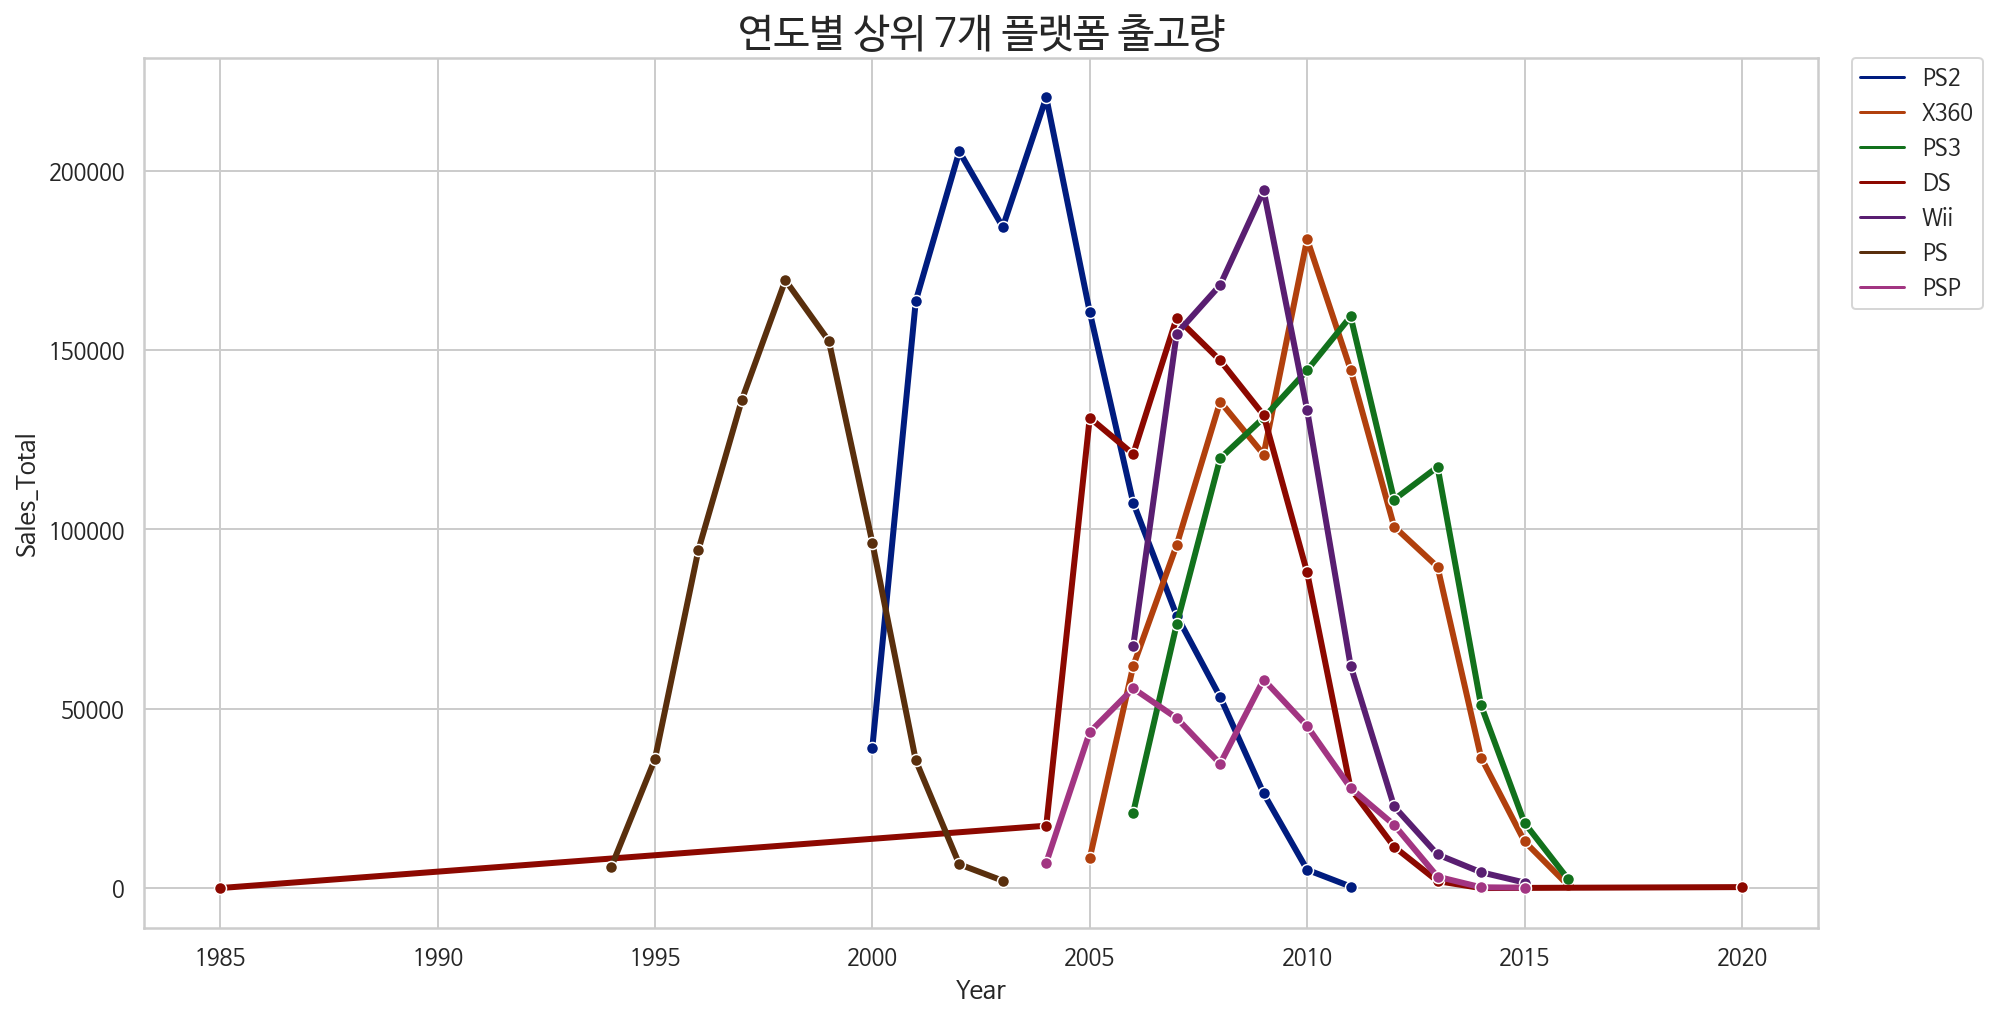

In [24]:
# 상위 7개 플랫폼 연도별 출고량
plt.figure(figsize=(15,8))

sns.lineplot(data=platform_rank7, x='Year', y='Sales_Total', hue='Platform', marker='o', linewidth=3)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad = 0.)
plt.title('연도별 상위 7개 플랫폼 출고량', fontsize=20)

In [25]:
# 중복값 확인
platform_rank7[platform_rank7.index.duplicated()]

,Year,Platform,Sales_Total


In [26]:
# 중복값 제거
platform_rank7 = platform_rank7.drop_duplicates

In [27]:
'''
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i+1)
        columnDf = df.iloc[:, i]
        if(not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[1]}(column {i}))')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()
'''

"\nfrom mpl_toolkits.mplot3d import Axes3D\nfrom sklearn.preprocessing import StandardScaler\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport os\nimport pandas as pd\n\ndef plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):\n    nunique = df.nunique()\n    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]\n    \n    nRow, nCol = df1.shape\n    columnNames = list(df1)\n    nGraphRow = (nCol + nGraphPerRow - 1)\n    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')\n    for i in range(min(nCol, nGraphShown)):\n        plt.subplot(nGraphRow, nGraphPerRow, i+1)\n        columnDf = df.iloc[:, i]\n        if(not np.issubdtype(type(columnDf.iloc[0]), np.number)):\n            valueCounts = columnDf.value_counts()\n            valueCounts.plot.bar()\n        else:\n            columnDf.hist()\n        plt.ylabel('counts')\n        plt.xticks(rotation = 90)\n        plt.title(f'{columnNames[

In [28]:
'''
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df2 = df.dropna('columns')
    df2 = df[[col for col in df if df[col].nunique() > 1]]
    if df_game.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df2.corr
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
'''

"\ndef plotCorrelationMatrix(df, graphWidth):\n    filename = df.dataframeName\n    df2 = df.dropna('columns')\n    df2 = df[[col for col in df if df[col].nunique() > 1]]\n    if df_game.shape[1] < 2:\n        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')\n        return\n    corr = df2.corr\n    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')\n    corrMat = plt.matshow(corr, fignum = 1)\n    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)\n    plt.yticks(range(len(corr.columns)), corr.columns)\n    plt.gca().xaxis.tick_bottom()\n    plt.colorbar(corrMat)\n    plt.title(f'Correlation Matrix for {filename}', fontsize=15)\n    plt.show()\n"

In [29]:
'''
def plotScatterMatrix(df3, plotSize, textSize):
    df3 = df.select_dtypes(include=[np.number])
    
    df3 = df.dropna('columns')
    df3 = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = list(df)
    df3 = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords = 'axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
'''              
                        

"\ndef plotScatterMatrix(df3, plotSize, textSize):\n    df3 = df.select_dtypes(include=[np.number])\n    \n    df3 = df.dropna('columns')\n    df3 = df[[col for col in df if df[col].nunique() > 1]]\n    columnNames = list(df)\n    if len(columnNames) > 10:\n        columnNames = list(df)\n    df3 = df[columnNames]\n    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')\n    corrs = df.corr().values\n    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):\n        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords = 'axes fraction', ha='center', va='center', size=textSize)\n    plt.suptitle('Scatter and Density Plot')\n    plt.show()\n"

In [30]:
#plotPerColumnDistribution(df, 10, 5)

In [31]:
# 연도별 게임 장르 트렌드 분석
df_year_trend = df.groupby(['Year', 'Genre'])['Genre'].count().unstack()
df_year_trend = df_year_trend.fillna(0)
df_year_trend.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1981.0,25.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4.0,0.0
1982.0,18.0,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,2.0,0.0
1983.0,7.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1984.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0


In [32]:
# 1980년대, 1990년대, 2000년대, 2010(20)년대 순으로 데이터 정렬
# 2018년 데이터와 2019년 데이터는 존재하지 않아서 제외
df_year_trend.loc['1980~1989', :] = df_year_trend.loc[[1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0]].sum()
df_year_trend.loc['1990~1999', :] = df_year_trend.loc[[1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0]].sum()
df_year_trend.loc['2000~2009', :] = df_year_trend.loc[[2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0]].sum()
df_year_trend.loc['2010~2020', :] = df_year_trend.loc[[2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0]].sum()

In [33]:
df_year_trend = df_year_trend.loc[['1980~1989','1990~1999','2000~2009','2010~2020']]
df_year_trend.reset_index() # 인덱스 초기화
df_year_trend.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980~1989,66.0,2.0,4.0,8.0,33.0,19.0,8.0,9.0,30.0,3.0,22.0,0.0
1990~1999,161.0,97.0,193.0,115.0,125.0,71.0,181.0,171.0,137.0,86.0,304.0,123.0
2000~2009,1579.0,631.0,442.0,997.0,565.0,361.0,797.0,729.0,718.0,551.0,1404.0,379.0
2010~2020,1434.0,538.0,196.0,561.0,150.0,115.0,233.0,556.0,395.0,206.0,569.0,167.0


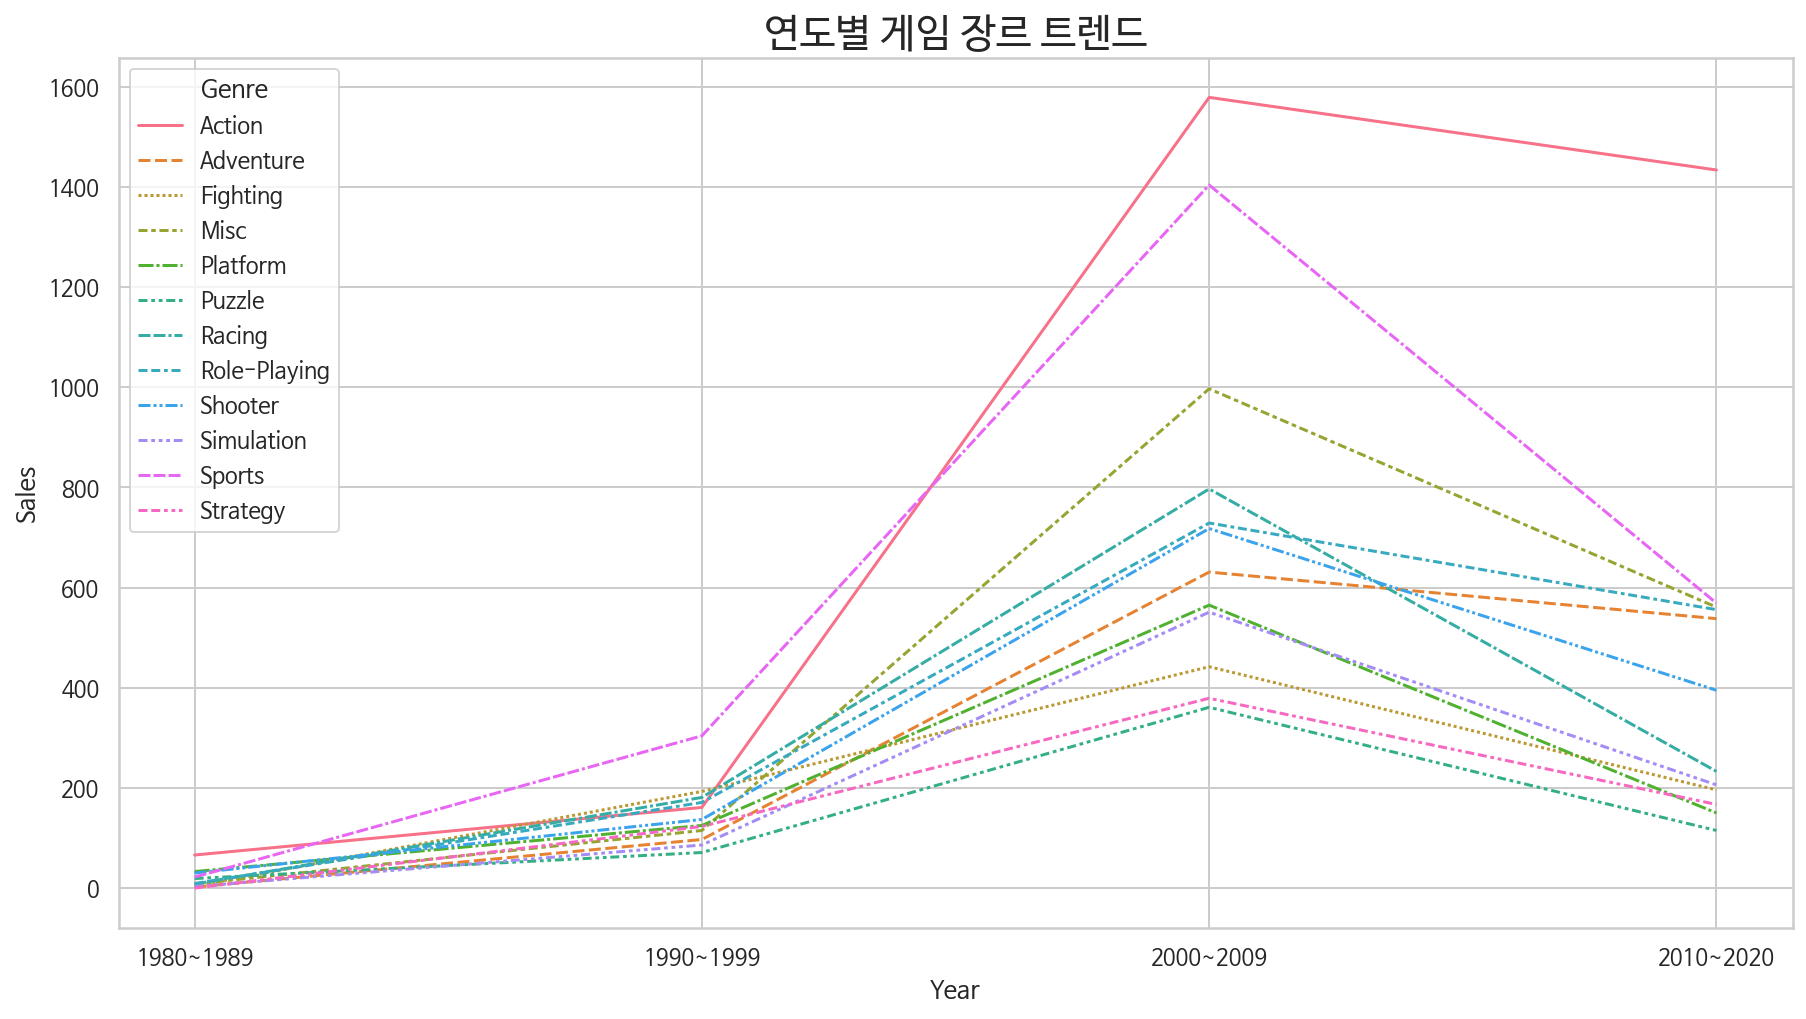

In [34]:
# 시각화
plt.figure(figsize=(15,8))
plt.title('연도별 게임 장르 트렌드', fontsize=20)
plt.ylabel('Sales')
sns.lineplot(data=df_year_trend);

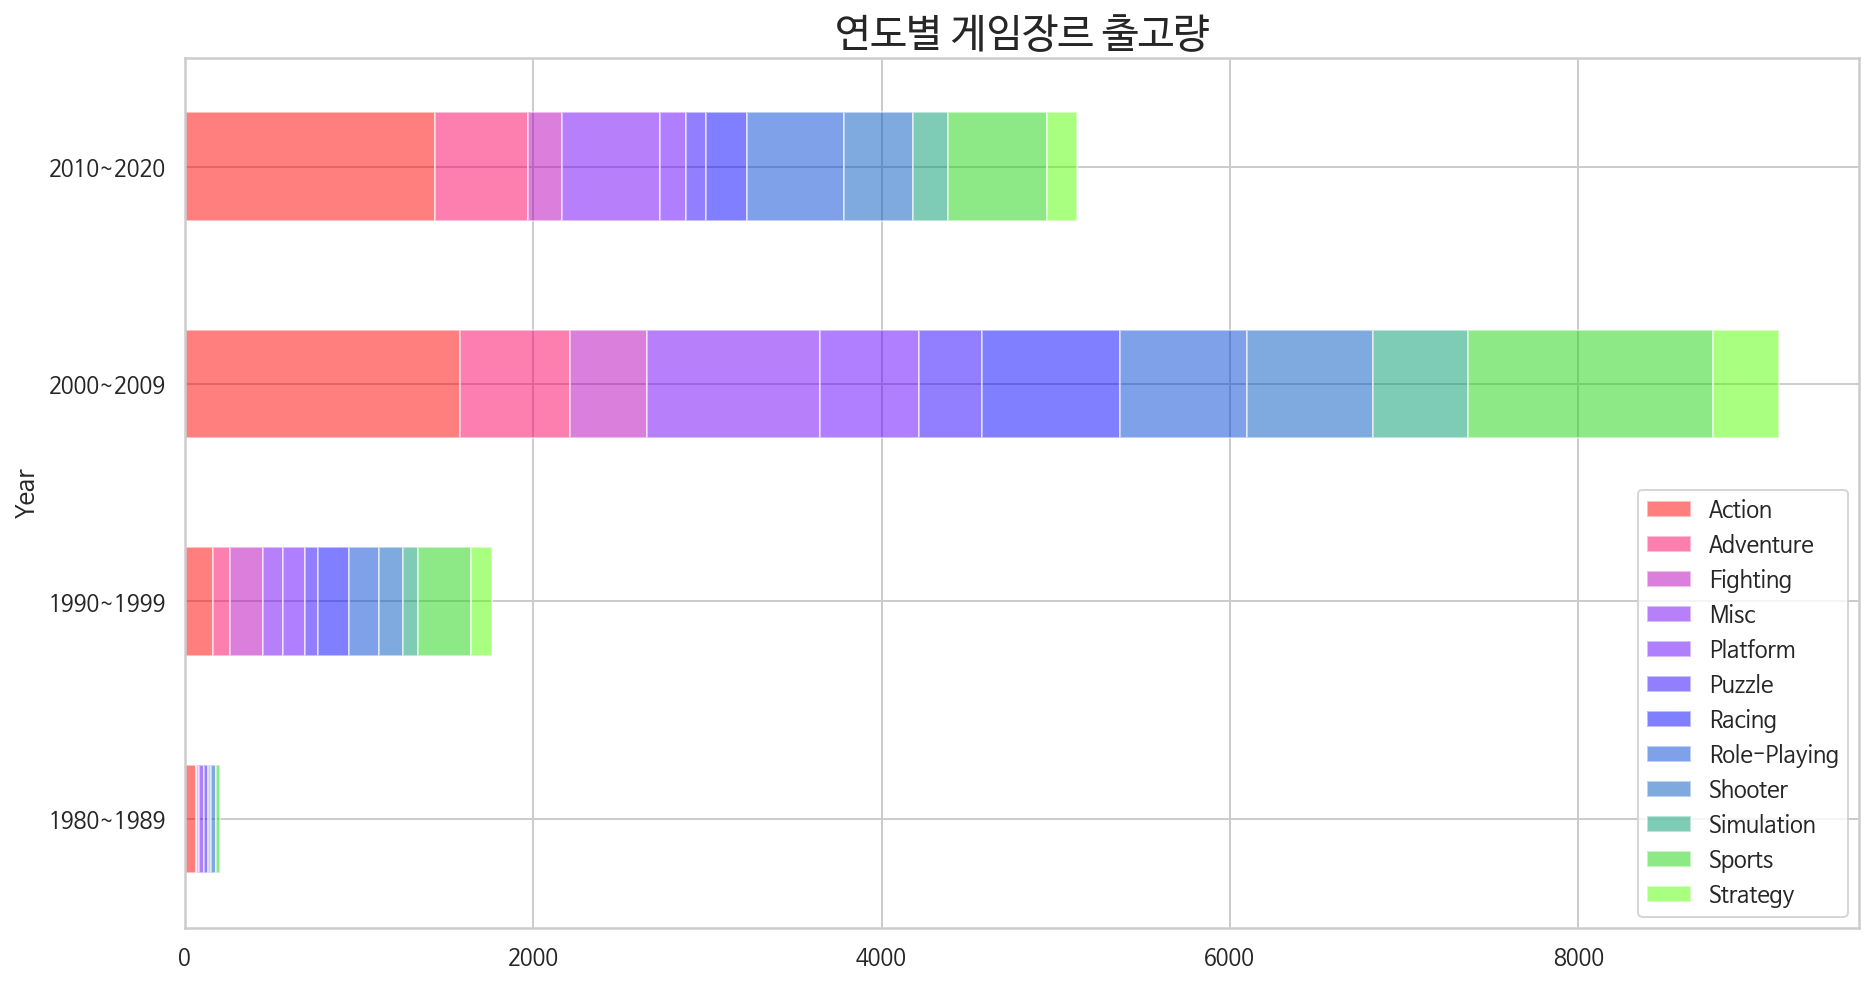

In [35]:
# 연도별 게임장르 출고량(barplot으로 보기좋게 시각화)
df_year_trend.plot(kind='barh', stacked=True, figsize=(15,8), cmap='prism', alpha=0.5)
plt.title('연도별 게임장르 출고량', fontsize=20)
plt.legend(loc='best');

In [36]:
# 출고량순위 50위 이내 게임의 장르별 출고량 분석
# 정렬
df_rank50 = df.sort_values(by='Sales_Total', ascending=False).head(50)
df_rank50.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Total
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380.0,9230.0,6500.0,2900.0,30010.0
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030.0,9200.0,2930.0,2850.0,29010.0
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590.0,7060.0,4700.0,2260.0,28610.0
11137,Nintendogs,DS,2005.0,Simulation,Nintendo,9070.0,11000.0,1930.0,2750.0,24750.0


In [37]:
df_rank50_genre = df_rank50.groupby('Genre')['Sales_Total'].sum().to_frame()

In [38]:
df_rank50_genre = df_rank50_genre.reset_index()
df_rank50_genre = df_rank50_genre.sort_values(by='Sales_Total', ascending=False)
df_rank50_genre.head()

,Genre,Sales_Total
4,Platform,149269.08
7,Role-Playing,129950.00
8,Shooter,123280.00
0,Action,122750.00
6,Racing,93205.85


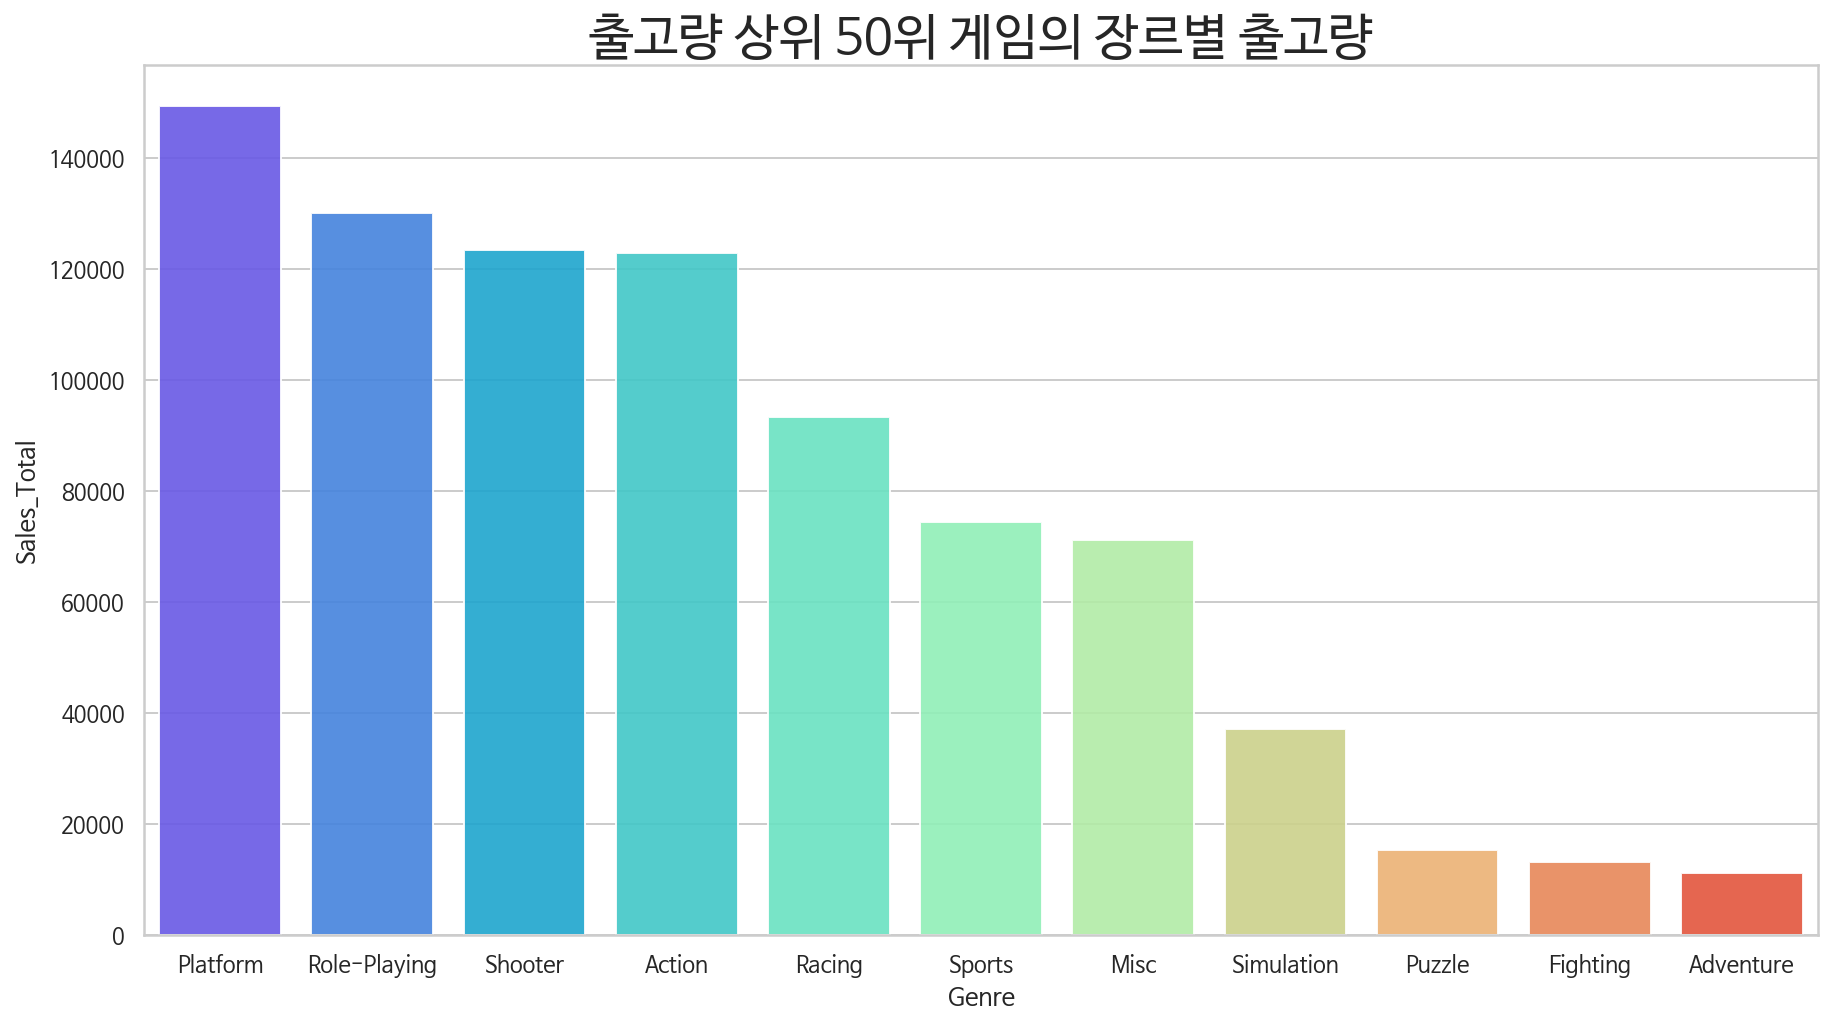

In [39]:
# 시각화
plt.figure(figsize=(15,8))
plt.title('출고량 상위 50위 게임의 장르별 출고량', fontsize=25)
sns.barplot(data=df_rank50_genre, x='Genre', y='Sales_Total', palette='rainbow', alpha=0.9);

In [40]:
# 출고량순위 50위 이내 게임플랫폼별 출고량 비율
df_rank50_platform = df_rank50.groupby(['Platform'])['Sales_Total'].sum()
df_rank50_platform = df_rank50_platform.to_frame()

top50_sales_total = df_rank50_platform['Sales_Total'].sum()

df_rank50_platform['Sales'] = round((df_rank50_platform['Sales_Total'] / top50_sales_total) * 100, 2)
df_rank50_platform.head()

,Sales_Total,Sales
Platform,,
3DS,23540.0,2.80
DS,171560.0,20.42
GB,98430.0,11.71
GBA,15840.0,1.88
N64,11900.0,1.42


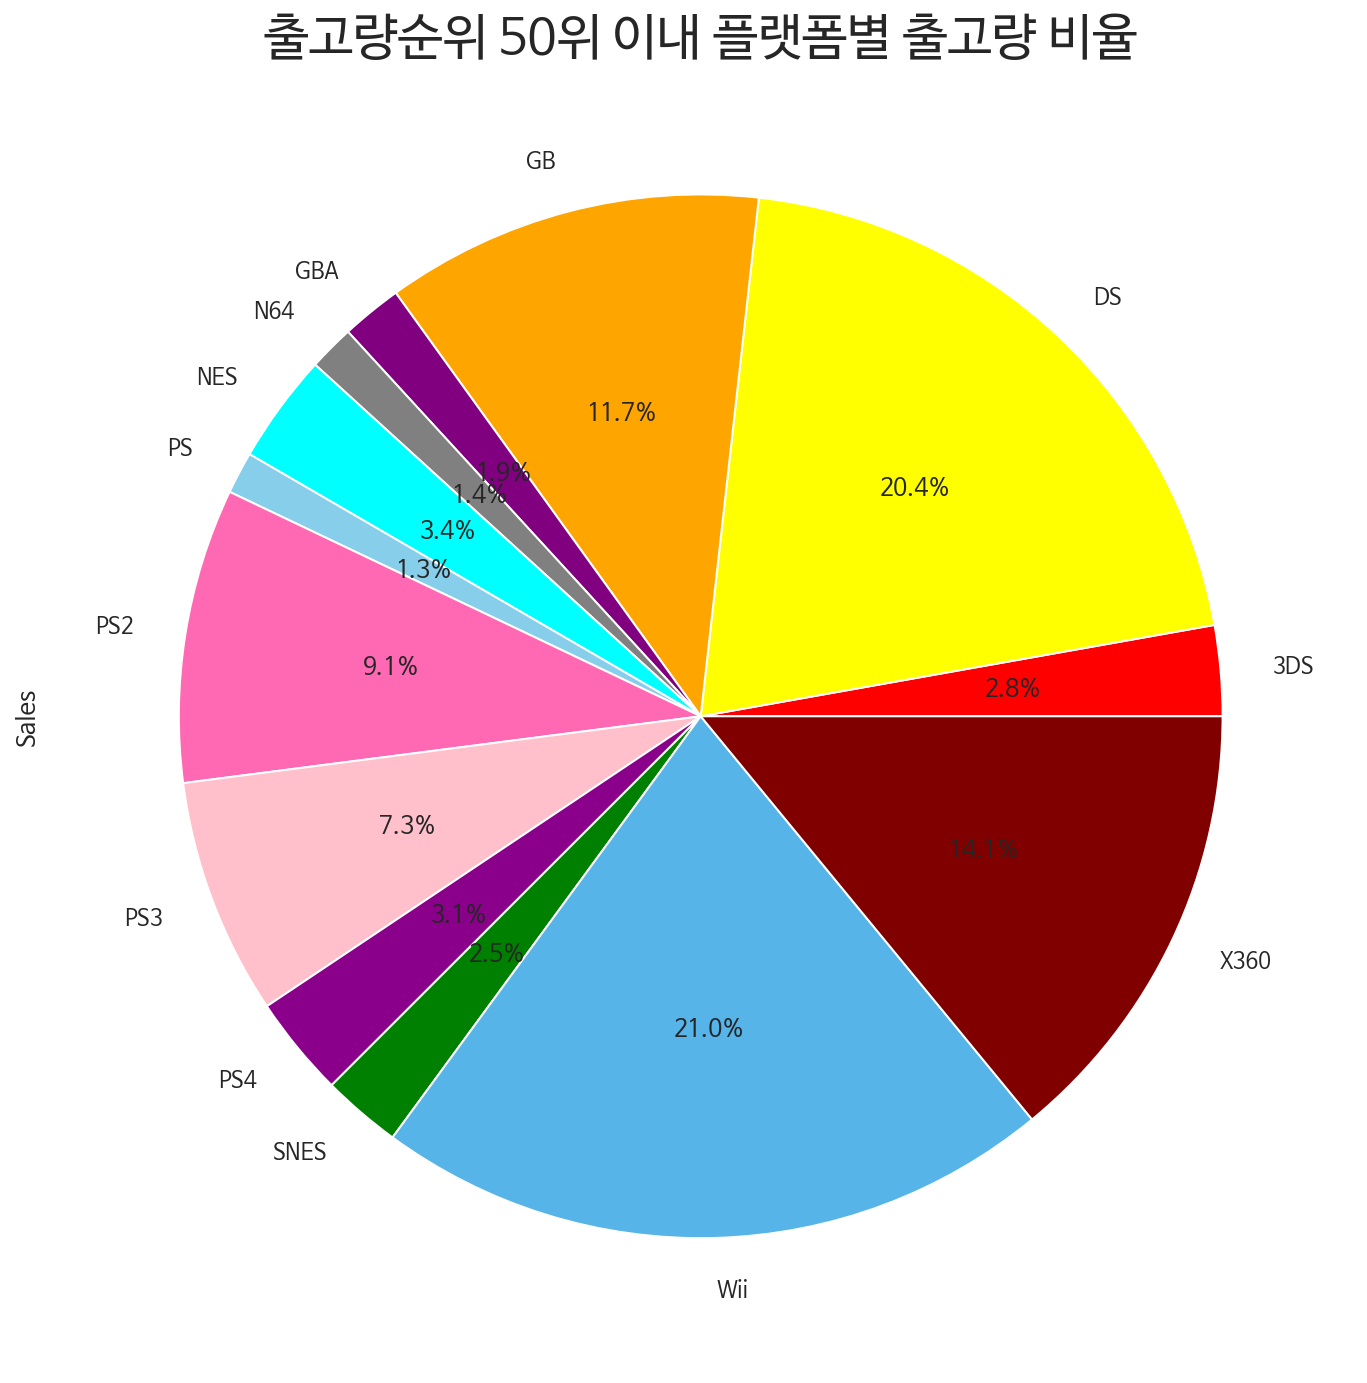

In [41]:
# 시각화(pie plot)
plt.figure(figsize=(12,12))
color=['red','yellow','orange','purple','gray','cyan','skyblue','hotpink','pink','darkmagenta','green','#56B4E9','Maroon']
df_rank50_platform['Sales'].plot(kind='pie', autopct = '%1.1f%%', colors=color)
plt.title('출고량순위 50위 이내 플랫폼별 출고량 비율', fontsize=25);

In [42]:
# 지역별 선호 게임장르
df_region_genre = df.groupby(['Genre'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
df_region_genre.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858750.00,523630.0,166590.0,193980.0
Adventure,101790.00,73650.0,61860.0,16700.0
Fighting,220350.00,99900.0,87140.0,46140.0
Misc,394730.00,208150.0,114170.0,82630.0
Platform,416329.08,200630.0,130530.0,51450.0


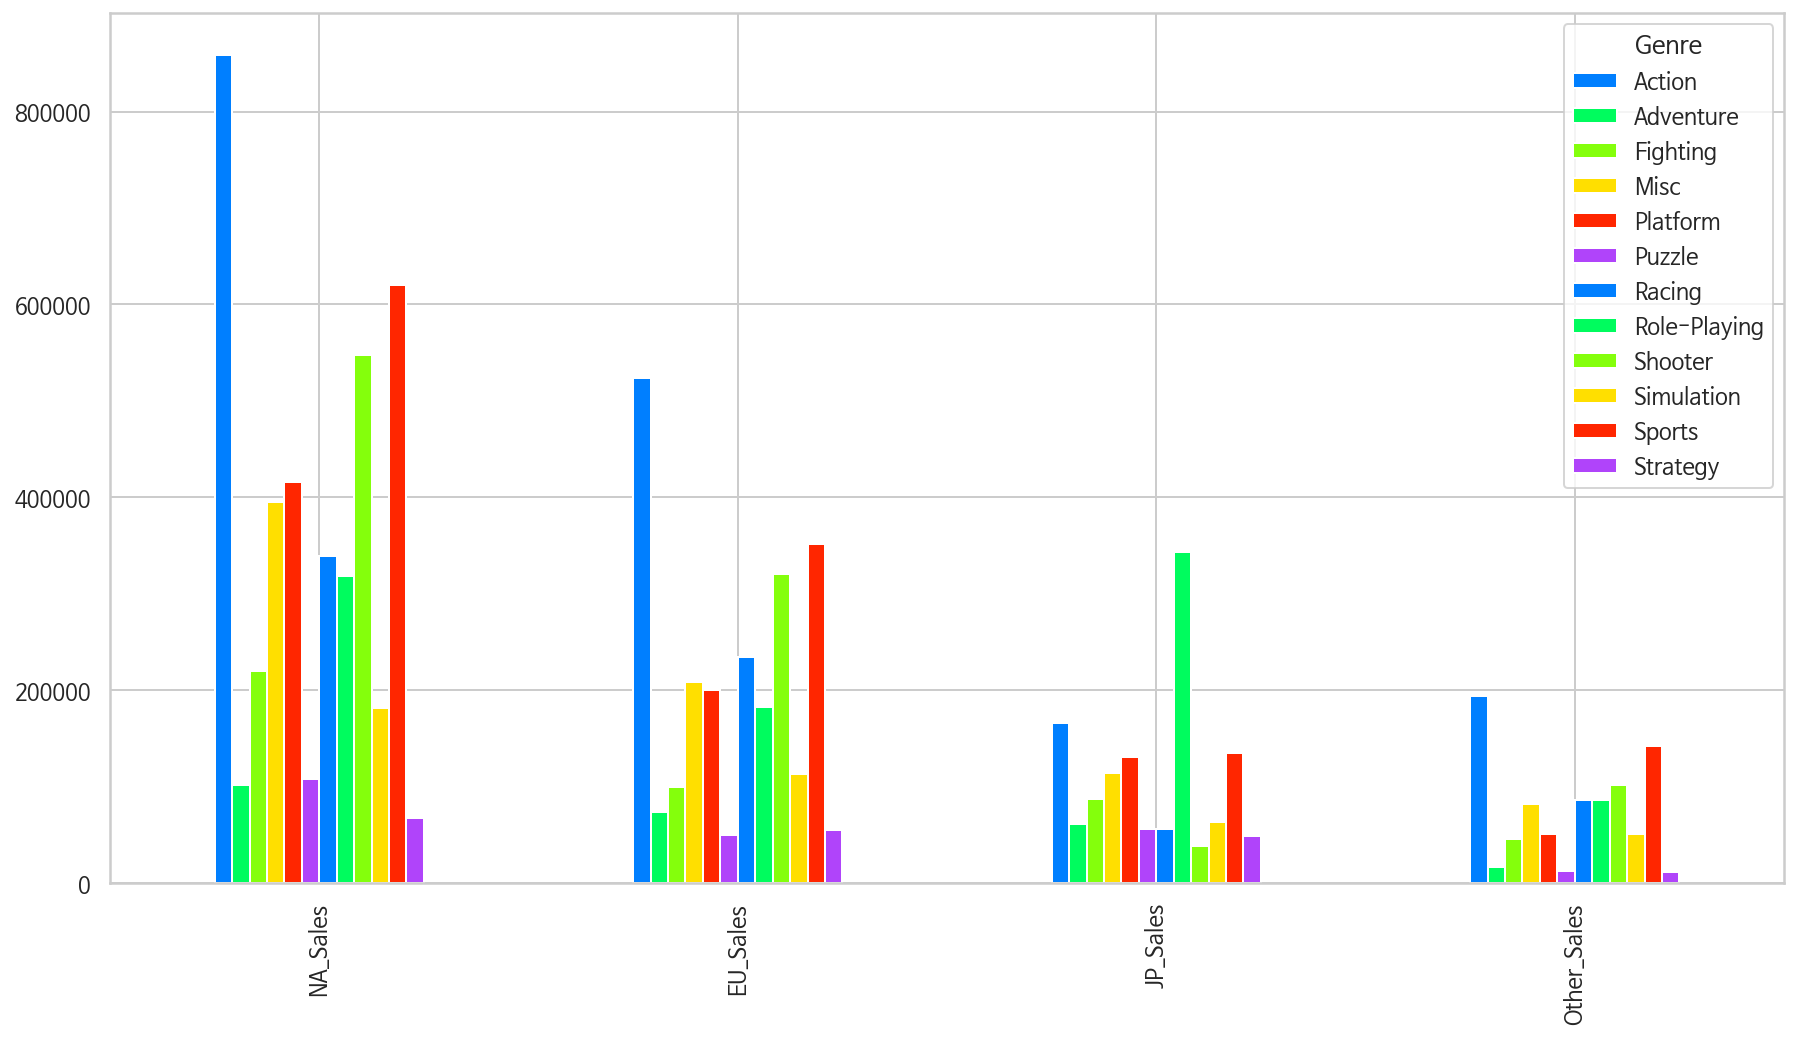

In [50]:
sns.set_palette('gist_ncar')
df_region_genre.T.plot.bar(figsize=(15,8));

In [44]:
# 게임 장르와 플랫폼의 연관 관계 찾기
# 귀무가설 : 게임 장르와 플랫폼은 연관성이 없다.
# 대립가설 : 게임 장르와 플랫폼은 연관성이 있다.
df_crosstab = pd.crosstab(df['Genre'], df['Platform'])
df_crosstab.head()

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,55,0,180,3,335,6,162,98,3,0,...,3,0,12,0,0,229,63,318,152,68
Adventure,1,1,36,11,237,5,35,20,2,0,...,26,0,4,1,0,83,3,47,26,11
Fighting,1,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,41,5,64,44,7
Misc,5,0,53,0,388,8,86,35,1,0,...,15,2,17,0,0,270,21,122,45,15
Platform,9,0,28,2,89,18,139,73,7,1,...,5,1,26,0,0,57,16,24,49,4


In [45]:
from scipy.stats import chi2_contingency
from scipy import stats
stats.chi2_contingency(df_crosstab)

# p-value : 0.0

(5820.019068400998,
 0.0,
 330,
 array([[2.29419371e+01, 5.98485315e-01, 9.93485623e+01, 1.03737455e+01,
         4.24326088e+02, 1.93510252e+01, 1.56404162e+02, 1.07926852e+02,
         5.38636783e+00, 1.99495105e-01, 6.24419679e+01, 1.95505203e+01,
         2.39394126e+00, 1.86527923e+02, 1.99495105e-01, 2.36401699e+02,
         4.23129118e+02, 2.59144141e+02, 6.68308602e+01, 2.37997660e+02,
         8.15934979e+01, 3.45126532e+01, 1.19697063e+00, 4.76793301e+01,
         3.98990210e-01, 1.19697063e+00, 2.56151715e+02, 2.85278000e+01,
         2.45578474e+02, 1.59396589e+02, 4.22929623e+01],
        [8.97851118e+00, 2.34222031e-01, 3.88808571e+01, 4.05984853e+00,
         1.66063420e+02, 7.57317899e+00, 6.12100240e+01, 4.22380395e+01,
         2.10799828e+00, 7.80740102e-02, 2.44371652e+01, 7.65125300e+00,
         9.36888123e-01, 7.29991996e+01, 7.80740102e-02, 9.25177021e+01,
         1.65594976e+02, 1.01418139e+02, 2.61547934e+01, 9.31422942e+01,
         3.19322702e+01, 1.3506803

In [46]:
# 장르별 플랫폼 게임 출고량
df_genre_platform = df.groupby(['Genre', 'Platform'])['Sales_Total'].sum().reset_index()
df_genre_platform

,Genre,Platform,Sales_Total
0,Action,2600,26310.0
1,Action,3DS,56490.0
2,Action,DC,1260.0
3,Action,DS,113990.0
4,Action,GB,7930.0
...,...,...,...
288,Strategy,Wii,5240.0
289,Strategy,WiiU,1240.0
290,Strategy,X360,9790.0
291,Strategy,XB,2740.0


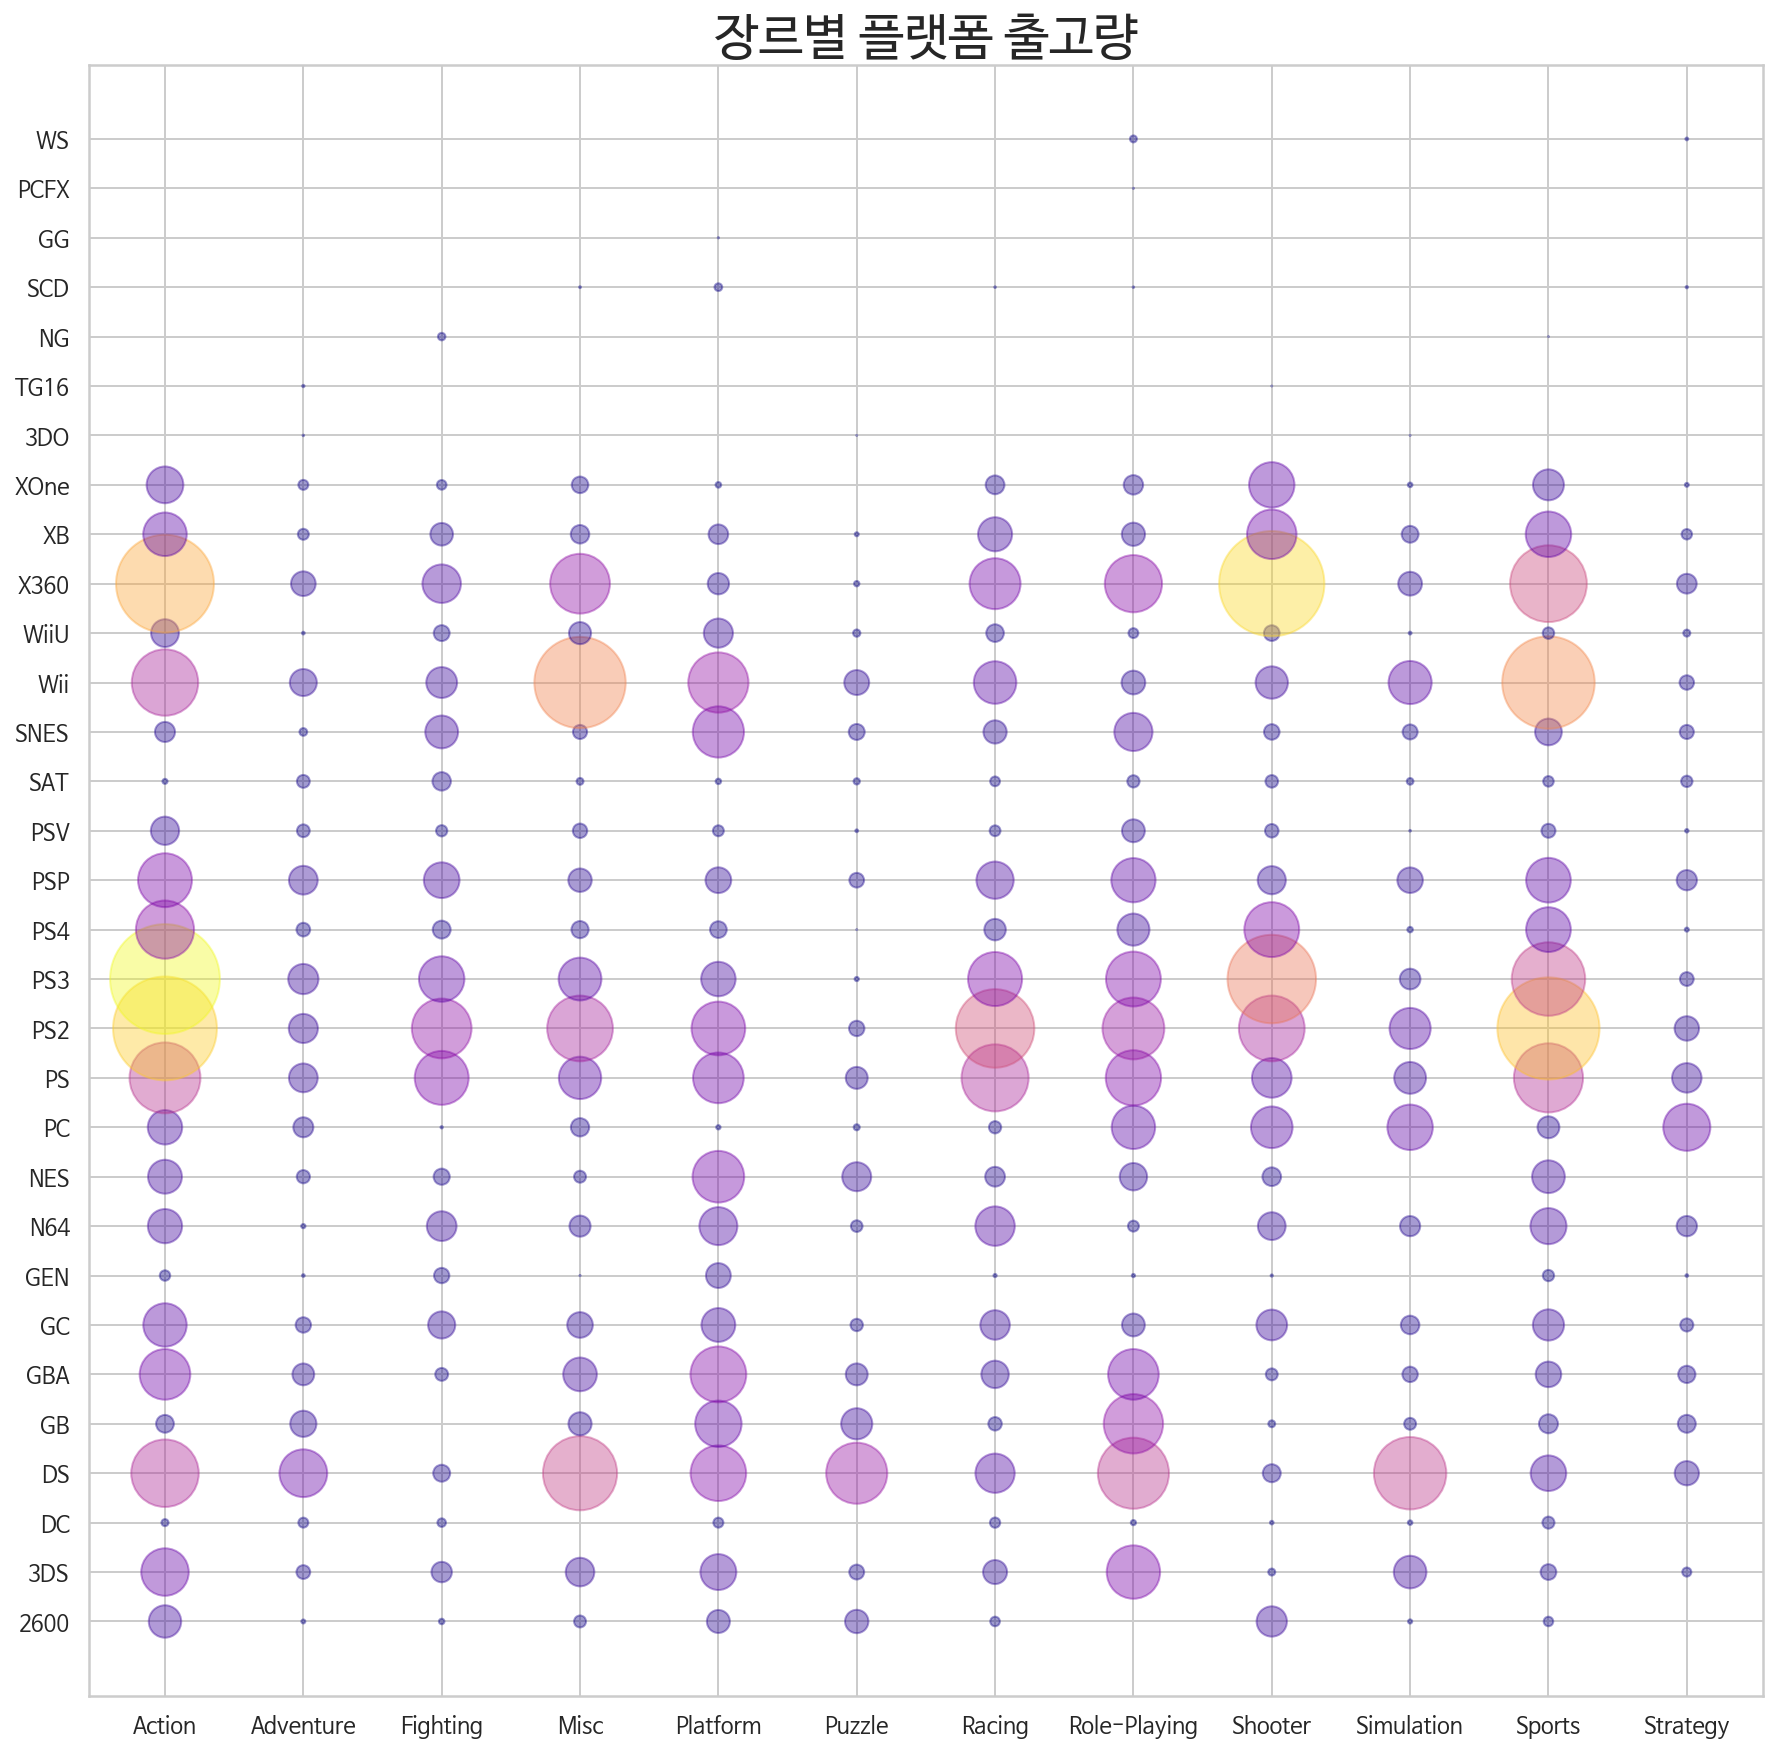

In [52]:
# 시각화(산점도)
plt.figure(figsize=(15,15))

plt.scatter(df_genre_platform['Genre'], df_genre_platform['Platform'], alpha=0.4,
             s=df_genre_platform['Sales_Total']/100, c=df_genre_platform['Sales_Total'], cmap='plasma')
plt.title('장르별 플랫폼 출고량', fontsize=25)
plt.show();